## Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Data Wrangling

In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv files
logins=pd.read_json(r"C:\Users\34658\SPRINGBOARD\Ultimate Technologies Inc\logins.json")

In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.head(2)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10


In [5]:
#check for null values
logins.isnull().sum()

login_time    0
dtype: int64

In [6]:
min15 = logins.set_index(logins['login_time']).resample('15T').count()

In [7]:
min15.shape

(9788, 1)

In [8]:
min15.head(2)

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6


In [9]:
min15.index.name = 'datetime'

In [10]:
min15['hour'] = pd.DatetimeIndex(min15.index).hour

In [11]:
min15['day'] = pd.DatetimeIndex(min15.index).day_name()

In [12]:
min15['month']=pd.DatetimeIndex(min15.index).month

In [13]:
min15.head(7)

,login_time,hour,day,month
datetime,,,,
1970-01-01 20:00:00,2,20,Thursday,1
1970-01-01 20:15:00,6,20,Thursday,1
1970-01-01 20:30:00,9,20,Thursday,1
1970-01-01 20:45:00,7,20,Thursday,1
1970-01-01 21:00:00,1,21,Thursday,1
1970-01-01 21:15:00,4,21,Thursday,1
1970-01-01 21:30:00,0,21,Thursday,1


<AxesSubplot:xlabel='datetime'>

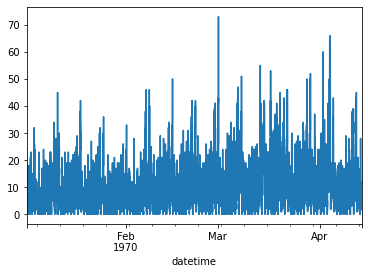

In [14]:
min15['login_time'].plot()

<AxesSubplot:xlabel='datetime'>

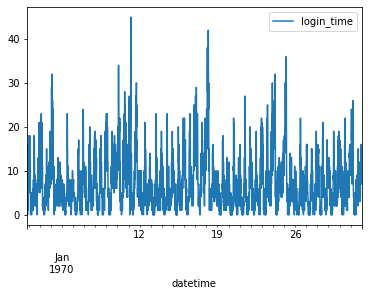

In [15]:
min15[min15['month']==1][['login_time','day']].plot()

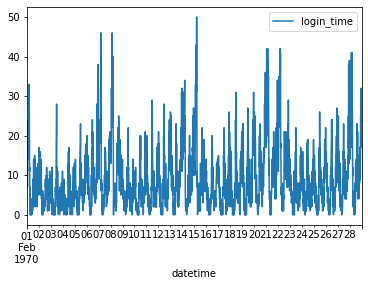

In [16]:
ax = min15[min15['month']==2][['login_time','day']].plot()

<AxesSubplot:xlabel='datetime'>

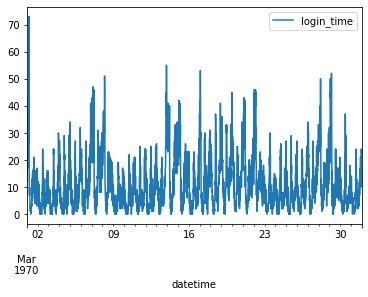

In [17]:
min15[min15['month']==3][['login_time','day']].plot()

<AxesSubplot:xlabel='datetime'>

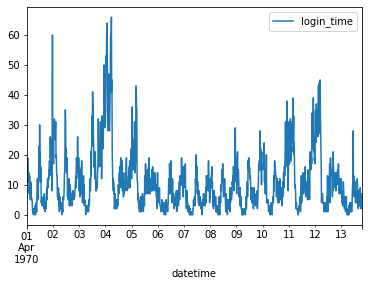

In [18]:
min15[min15['month']==4][['login_time','day']].plot()

In [19]:
daily=min15.groupby(['day','month'])['login_time'].agg('sum').sort_values(ascending=False).reset_index()

C:\Users\34658\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


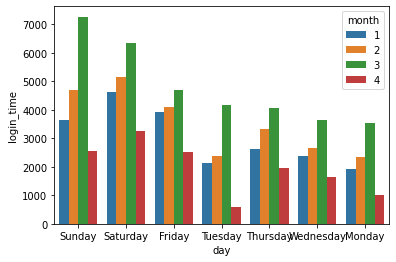

In [20]:
sns.barplot('day', 'login_time', hue='month', data=daily)
plt.show()

It is clear that in weeekends there is more volume of petitions than during work days. January and February have more or less the same users per day. In March there is a peak of users, it is the Month of more business. April has less volume but that is beecause there is only information of half a month instead of a full month.

In [21]:
hourly=min15.groupby(['hour','day'])['login_time'].agg('sum').sort_values(ascending=False).reset_index()

In [22]:
hourly.head(10)

,hour,day,login_time
0,4,Sunday,2107
1,4,Saturday,1719
2,3,Sunday,1647
3,2,Saturday,1608
4,2,Sunday,1608
5,3,Saturday,1574
6,1,Saturday,1562
7,22,Friday,1519
8,1,Sunday,1355
9,23,Friday,1298


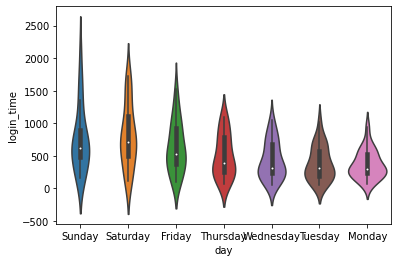

In [23]:
sns.violinplot(x='day',y='login_time', data=hourly)
plt.show()

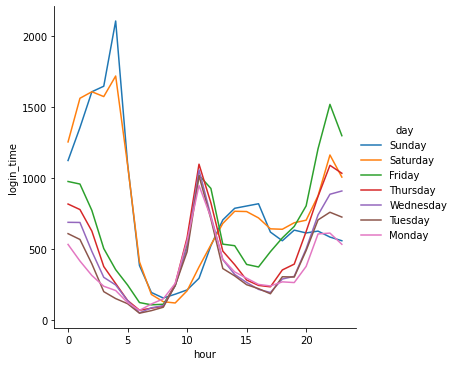

In [24]:
sns.relplot(data=hourly, x="hour", y="login_time", hue="day", kind='line')

On weekends there is a high demand at late night hours, probably from clients using the service to meet or go back home after meeting. The demand is very low early in the mornings and raises progressively. On Sunday evening the demand does not grow before late hours but on saturday it does.

On weekdays there is a much lower demand at late hours, and a peak of demand is observed around 9-11 am, then it drops down and raises again after 6pm, specially on Friday. Demand seems to explain the routine "rush" hours.